In [1]:
from matplotlib.colors import ListedColormap as listed_colormap
from matplotlib import pyplot as plot
from sklearn import cross_validation, datasets, metrics, neighbors, model_selection

import numpy
%matplotlib inline

/usr/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Генерация выборки
classification_problem = datasets.make_classification(
    n_samples=100, n_features=2, n_informative=2, 
    n_classes=3, n_redundant=0, 
    n_clusters_per_class=1, random_state=2
)

In [3]:
# Цвета визуализации
colors = listed_colormap(['red', 'blue', 'yellow'])
light_colors = listed_colormap(['lightcoral', 'lightblue', 'lightyellow'])

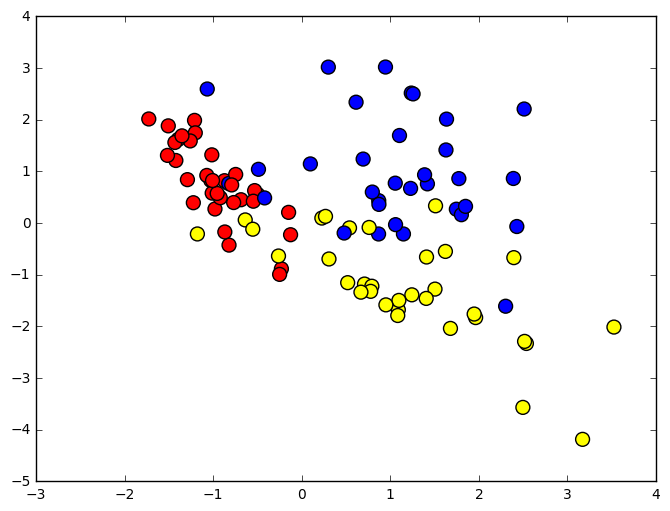

In [4]:
# Визуализируем выборку
plot.figure(figsize=(8,6))
plot.scatter(
    map(lambda x: x[0], classification_problem[0]),
    map(lambda x: x[1], classification_problem[0]),
    c=classification_problem[1], cmap=colors, s=100
)

In [5]:
def get_meshgrid(data, step=0.05, border=0.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return numpy.meshgrid(numpy.arange(x_min, x_max, step), numpy.arange(y_min, y_max, step))

In [6]:
def plot_decision_surface(estimator, k, train_data, train_labels, test_data, test_labels, 
                          colors=colors, light_colors=light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    plot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = numpy.array(estimator.predict(numpy.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plot.title('Train data, accuracy={:.2f}, k={}'.format(
            metrics.accuracy_score(train_labels, estimator.predict(train_data)), k
        )
    )
    
    #plot decision surface on the test data
    plot.subplot(1,2,2)
    plot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    plot.title('Test data, accuracy={:.2f}, k={}'.format(
            metrics.accuracy_score(test_labels, estimator.predict(test_data)), k
        )
    )

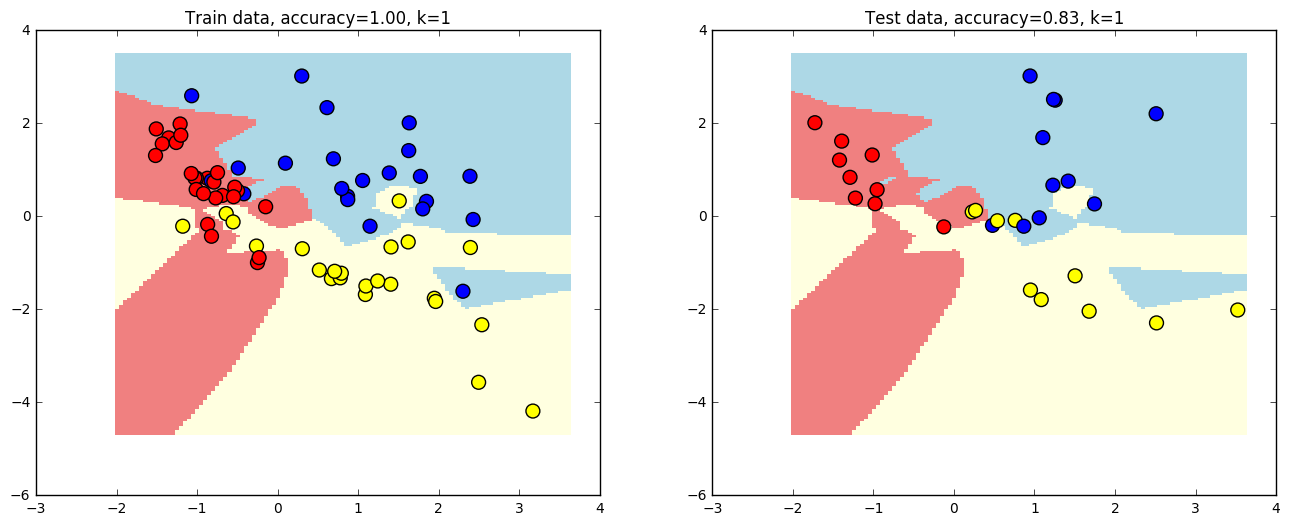

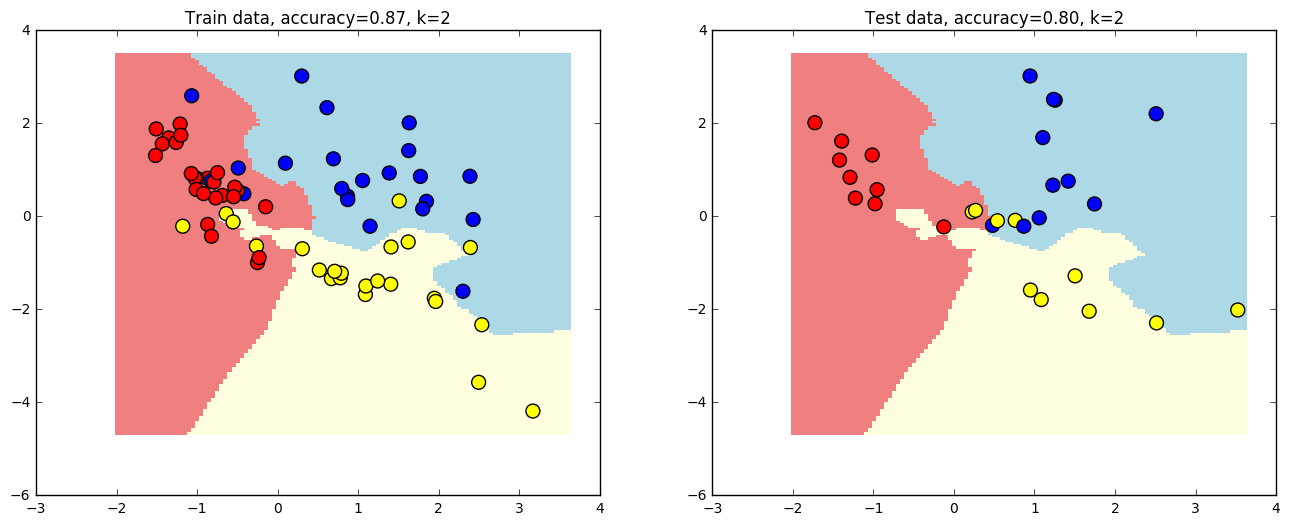

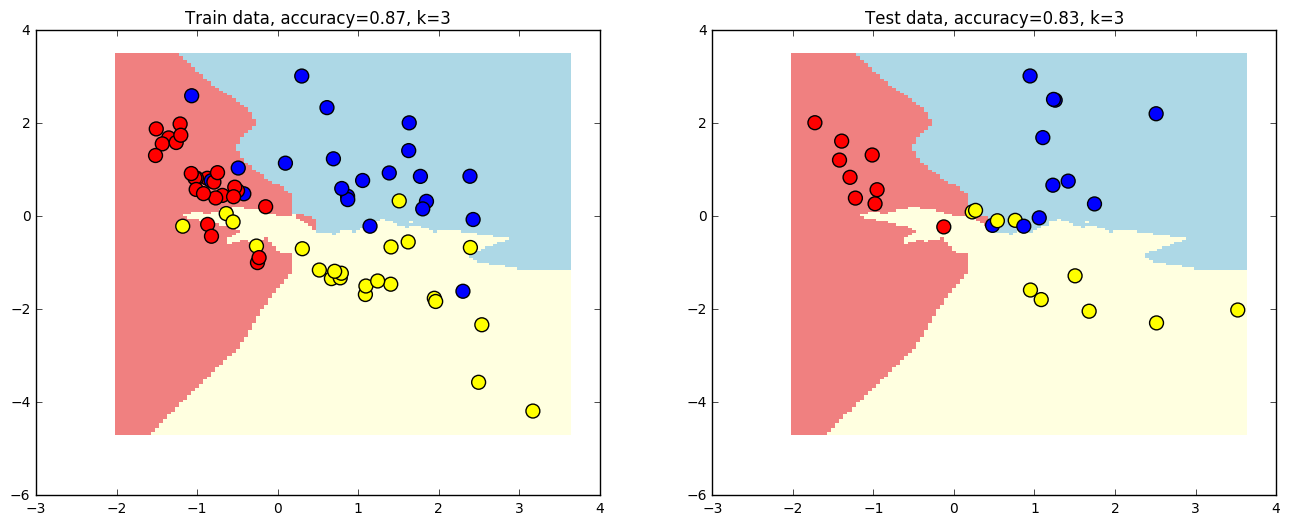

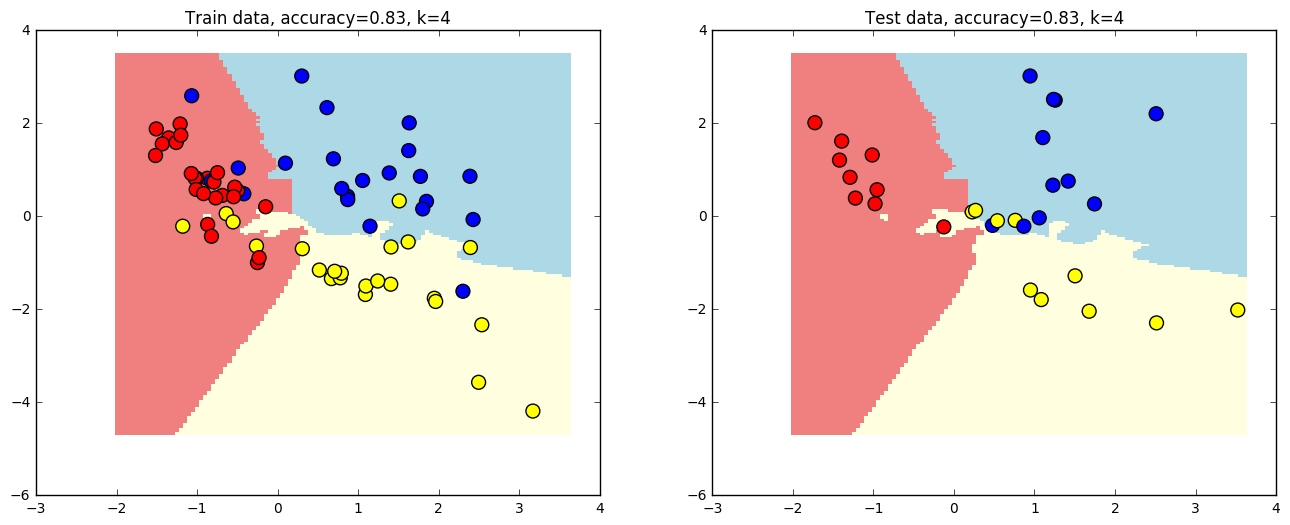

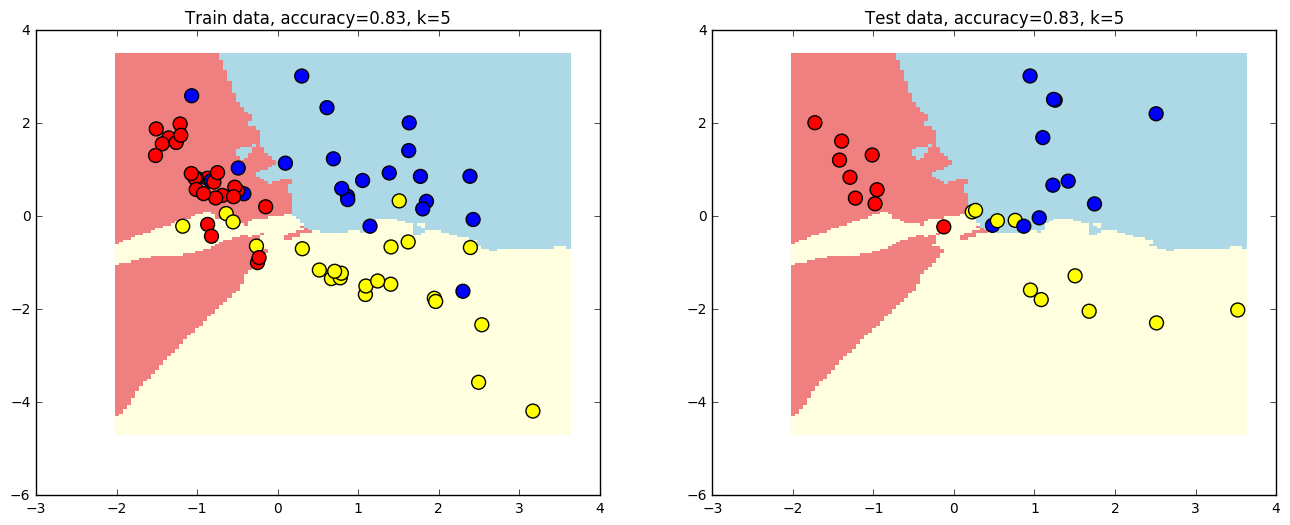

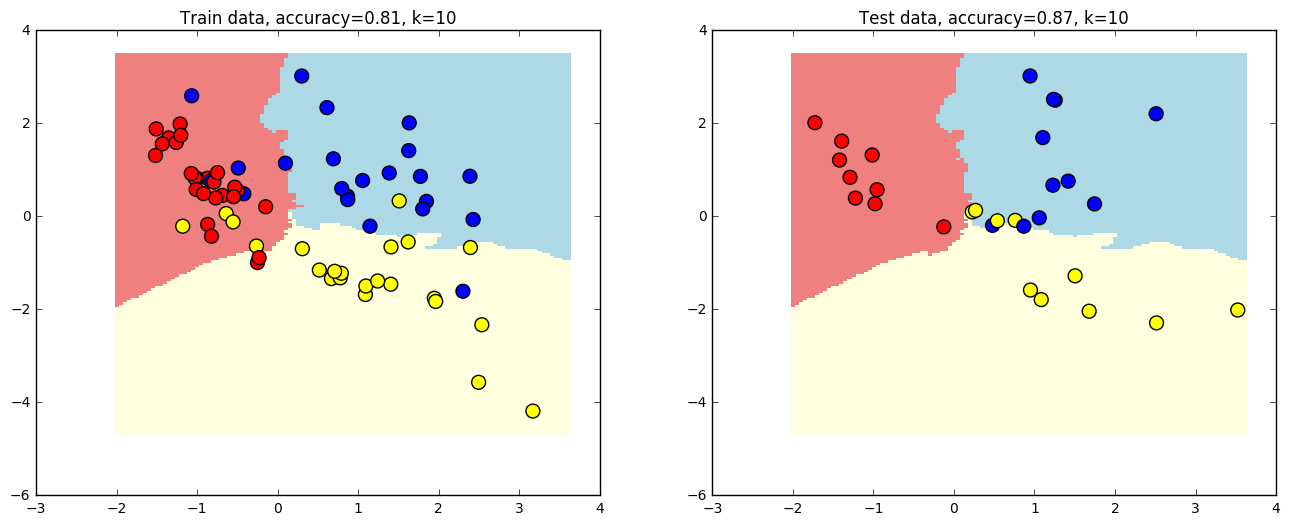

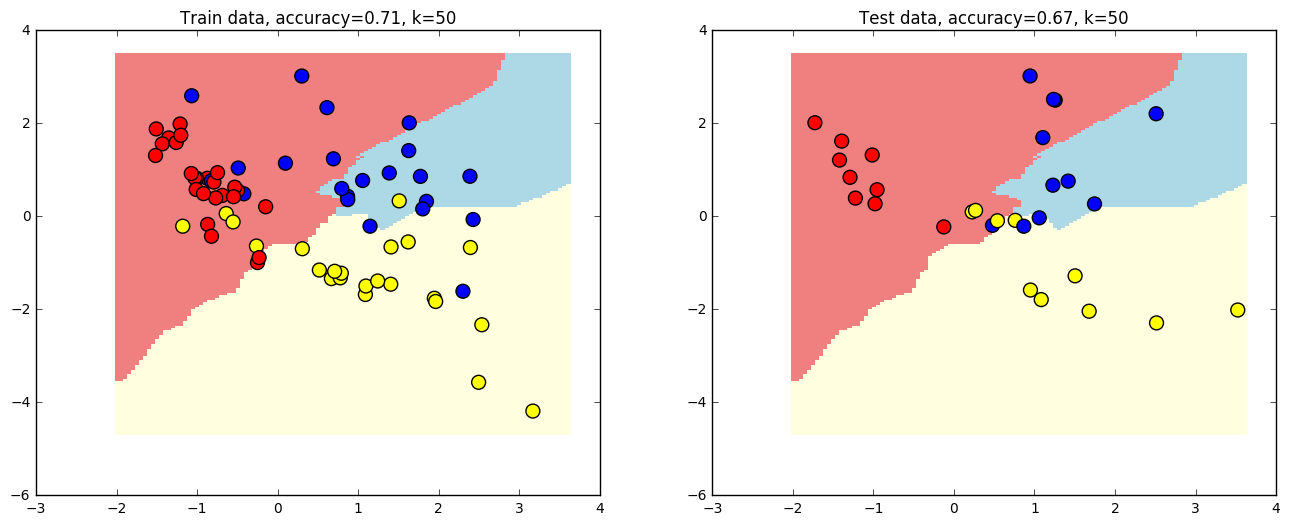

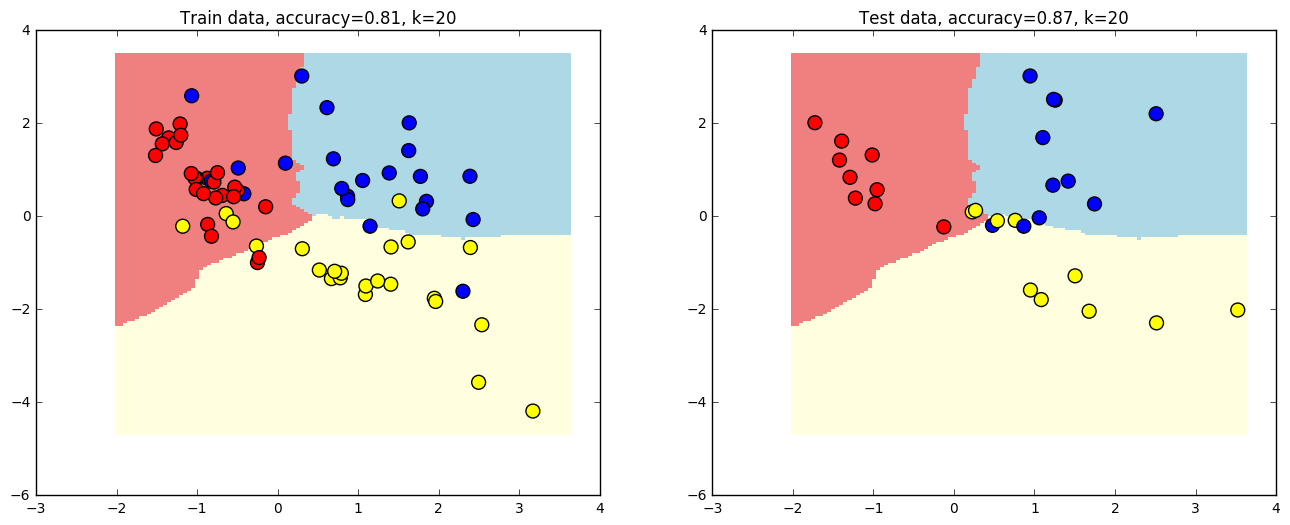

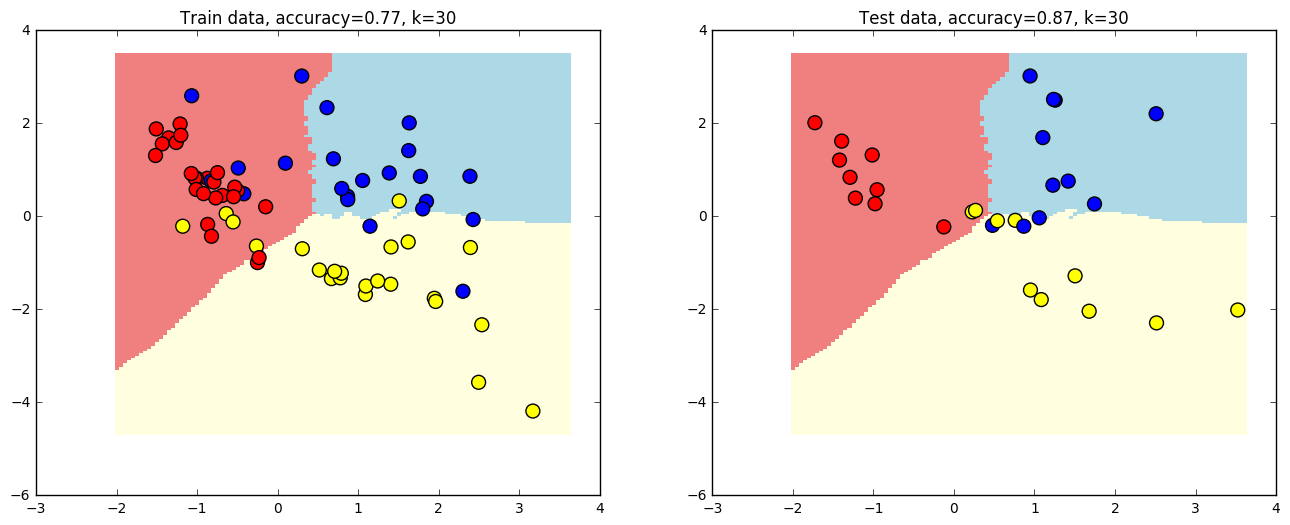

In [7]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(
    classification_problem[0], classification_problem[1], 
    test_size = 0.3, random_state = 1
)

for k in {1, 2, 3, 4, 5, 10, 20, 30, 50}:
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
    estimator.fit(train_data, train_labels)
    plot_decision_surface(estimator, k, train_data, train_labels, test_data, test_labels)

In [8]:
# Рассчитываем accuracy для разных k и находим оптимальное значение

accuracies = []
for k in range(1, 80):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
    k_fold = model_selection.KFold(n_splits=5)
    accuracy_sum = 0
    for train_index, test_index in k_fold.split(classification_problem[0]):
        train_data, test_data = classification_problem[0][train_index], classification_problem[0][test_index]
        train_labels, test_labels = classification_problem[1][train_index], classification_problem[1][test_index]
        estimator.fit(train_data, train_labels)
        accuracy_sum += metrics.accuracy_score(test_labels, estimator.predict(test_data))
    accuracies.append(accuracy_sum / 5)

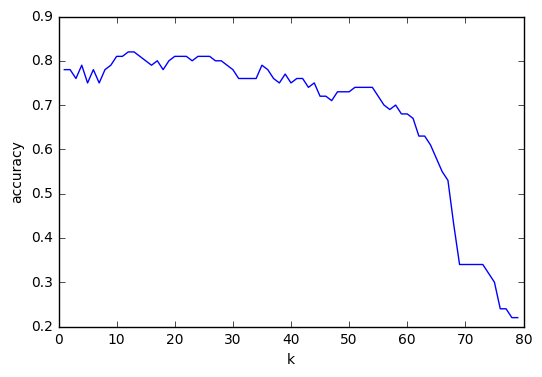

In [9]:
plot.plot(range(1, len(accuracies) + 1), accuracies)

axis = plot.gca()
axis.set_xlabel("k")
axis.set_ylabel("accuracy")

In [10]:
best_k = numpy.argmax(accuracies)
print(best_k + 1)

12


При разных значениях random_state разные k получаются оптимальными. Т.е. судить об оптимальном k для различных выборок мысла не имеет. Можно лишь проследить некоторые закономерности, например оптимальное k обычно не болше 15.